## Teoría de señales

María Alejandra Gonzalez Duque    cc.1006109184

Lina María Chavarro Meza       cc.193516928

Yuli Fernanda Ruiz Goyes        cc.1089030069

In [ ]:
!pip install lcapy==1.14

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
#Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import gamma
from lcapy import Circuit, j , omega, s
from scipy import signal


from scipy.signal import lti
from scipy.stats import expon
import scipy.fftpack as fourier
from scipy.fftpack import fft,fftfreq,fftshift
import seaborn as sns  ##HISTOGRAMAS
from numpy import logspace
import sympy as sym

# Parte 1

In [ ]:
#Funciones a utilizar
def gaussian(x, mu, sigma): #definimos una distribucion gaussiana con su fdp y sus parametros
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))#FDP de una gaussiana

def neg_log_likelihood(params, x): ##Funcion de verosimilitud negativa,para minimizar parametros
    mu, sigma = params
    return -np.sum(np.log(gaussian(x, mu, sigma)))

def fit_gaussian(x): ## Funcion para ajustar una distribucion gaussiana a un conjunto de datos
    result = minimize(neg_log_likelihood, [0, 1], args=(x,))
    mu, sigma = result.x
    return mu, sigma

def log_likelihood(lmbda, data): ##Funcion de maxima verosimilitud
    n = len(data)
    return n * np.log(lmbda) - lmbda * np.sum(data)



In [ ]:
# Datos de muestra para la distribución gaussiana
mu = 0.1  # Media verdadera
sigma = 1  # Desviación estándar verdadera
N = 4096  # Número de muestras
data = np.random.normal(loc=mu, scale=sigma, size=N)  # Generar datos de muestra (señal aleatoria)


In [ ]:

# Datos de muestra para la distribución uniforme
Vmin = -1  # limite inferior
Vmax= 1  # limite superior
N = 4096  # Número de muestras
dataz = np.random.uniform(low=Vmin, high=Vmax, size=N) # Generar datos de muestra (señal aleatoria)



# Parte 2

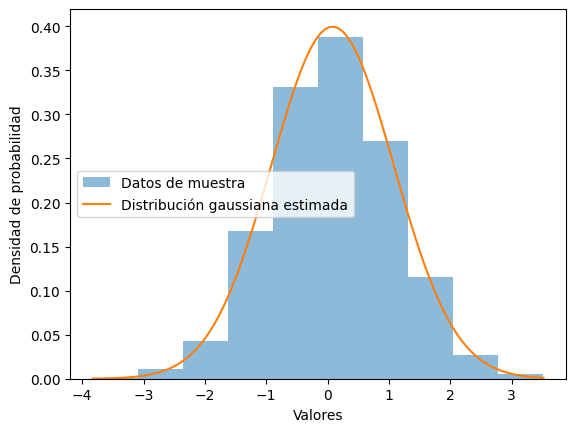

In [ ]:
#Estimación por máxima verosimilitud
# Función de log-verosimilitud para una distribución gaussiana
def log_likelihood(params, data):
    mu, sigma = params  # Parámetros a estimar: media y desviación estándar
    N = len(data)  # Número de muestras
    log_likelihood = -0.5 * N * np.log(2 * np.pi) - N * np.log(sigma) - np.sum((data - mu) ** 2) / (2 * sigma ** 2)  # Fórmula de log-verosimilitud para una distribución gaussiana
    return -log_likelihood  # Se devuelve el negativo del log-verosimilitud para minimizar

# Estimación de máxima verosimilitud para los parámetros de la distribución gaussiana
result = minimize(lambda params: log_likelihood(params, data), x0=[0, 1], method='L-BFGS-B')  # Estimar mu y sigma utilizando el método de máxima verosimilitud
mu_hat, sigma_hat = result.x  # Obtener los valores estimados de mu y sigma

# Generar una grilla de valores para graficar la distribución gaussiana estimada
x = np.linspace(np.min(data), np.max(data), 100)  # Generar una grilla de valores para el eje x
pdf = 1 / (sigma_hat * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu_hat) / sigma_hat) ** 2)  # Calcular los valores de la distribución gaussiana estimada en la grilla de valores x

# Graficar los datos de muestra y la distribución gaussiana estimada
plt.hist(data, density=True, alpha=0.5, label='Datos de muestra')  # Graficar histograma normalizado de los datos de muestra
plt.plot(x, pdf, label='Distribución gaussiana estimada')  # Graficar la distribución gaussiana estimada
plt.legend()  # Agregar leyenda a la gráfica
plt.xlabel('Valores')  # Etiquetar el eje x
plt.ylabel('Densidad de probabilidad')  # Etiquetar el eje y
plt.show()  # Mostrar la gráfica

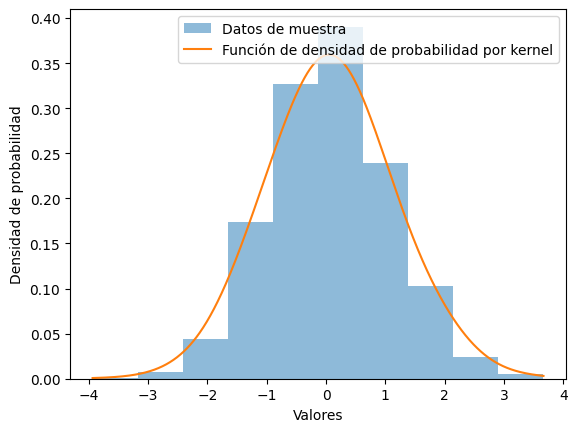

Media estimada: 0.07
Varianza estimada: 1.03


In [ ]:
#Estimación por kernel
from sklearn.neighbors import KernelDensity

# Configuración del tiempo entre puntos en el espacio
dt = 1  # segundos
N = 4096  # Número de muestras
t = np.arange(0, N*dt, dt)  # Vector de tiempo

# Datos de muestra
mu = 0.1  # Media verdadera
sigma = 1  # Desviación estándar verdadera
data = np.random.normal(loc=mu, scale=sigma, size=N)  # Generar datos de muestra (señal aleatoria)

# Estimación de la función de densidad de probabilidad por kernel
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data.reshape(-1, 1))  # Crear el objeto KernelDensity y ajustarlo a los datos
x = np.linspace(np.min(data), np.max(data), 1000)  # Generar una grilla de valores para el eje x
pdf = np.exp(kde.score_samples(x.reshape(-1, 1)))  # Calcular la PDF utilizando el objeto KernelDensity ajustado

# Graficar los datos de muestra y la función de densidad de probabilidad por kernel
plt.hist(data, density=True, alpha=0.5, label='Datos de muestra')  # Graficar histograma normalizado de los datos de muestra
plt.plot(x, pdf, label='Función de densidad de probabilidad por kernel')  # Graficar la función de densidad de probabilidad por kernel
plt.legend()  # Agregar leyenda a la gráfica
plt.xlabel('Valores')  # Etiquetar el eje x
plt.ylabel('Densidad de probabilidad')  # Etiquetar el eje y
plt.show()  # Mostrar la gráfica
print("Media estimada: {:.2f}".format(np.mean(data)))
print("Varianza estimada: {:.2f}".format(np.var(data)))


/tmp/ipykernel_1282/1493716250.py:5: RuntimeWarning: invalid value encountered in log
  log_likelihood = -N*np.log(high-low)


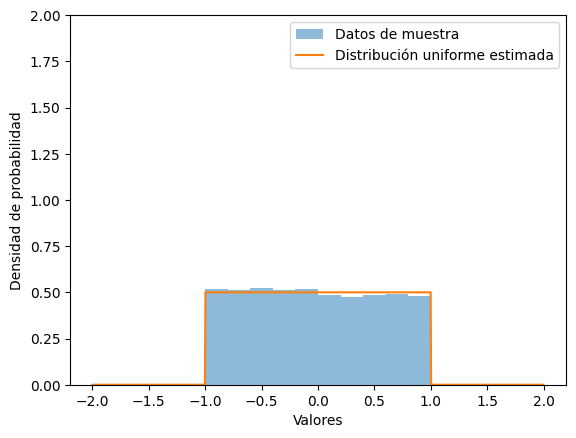

In [ ]:
# Función de log-verosimilitud para una distribución uniforme
def log_likelihood(params, dataz):
    low, high = params  # Parámetros a estimar: Vmin y Vmax
    N = len(dataz)  # Número de muestras
    log_likelihood = -N*np.log(high-low)
    return -log_likelihood  # Se devuelve el negativo del log-verosimilitud para minimizar

# Estimación de máxima verosimilitud para los parámetros de la distribución uniforme
result = minimize(lambda params: log_likelihood(params, dataz), x0=[-1, 1], method='L-BFGS-B')  # Estimar vmin y vmax utilizando el método de máxima verosimilitud
low_hat, high_hat = result.x  # Obtener los valores estimados de vmin y vmax
N = len(dataz) 

# Generar una grilla de valores para graficar la distribución uniforme estimada
x = np.linspace((np.min(dataz)-1), (np.max(dataz)+1), 1000) 

 # Generar una grilla de valores para el eje x
pdf = np.where((x >= low_hat) & (x <= high_hat), 1 / (high_hat - low_hat), 0)  # Calcular los valores de la distribución uniforme estimada en la grilla de valores x

# Graficar los datos de muestra y la distribución uniforme estimada
plt.hist(dataz, density=True, alpha=0.5, label='Datos de muestra')  # Graficar histograma normalizado de los datos de muestra

plt.plot(x,pdf,  label='Distribución uniforme estimada')  # Graficar la distribución uniforme estimada
plt.legend()  # Agregar leyenda a la gráfica
plt.ylim(0,2)
plt.xlabel('Valores')  # Etiquetar el eje x
plt.ylabel('Densidad de probabilidad')  # Etiquetar el eje y
plt.show()  # Mostrar la gráfica

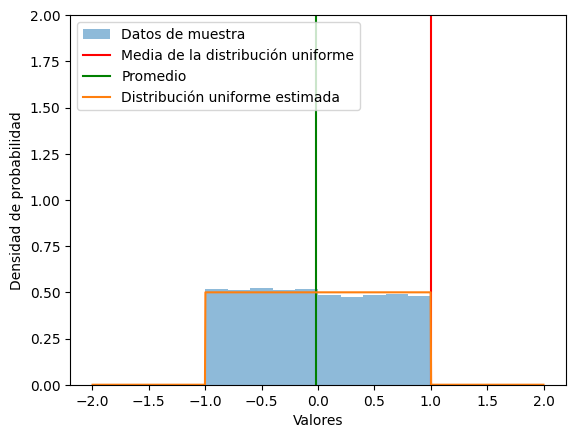

In [ ]:
#Calculamos la  media a partir de la formula de la distribucion y la graficamos

media = (high_hat-low_hat)/2
promedio = np.mean(dataz) #calculamos el promedio de la distribución
varianza = ((high_hat-low_hat)**2/12) #calculamos la varianza con la formula de la distribución
plt.hist(dataz, density=True, alpha=0.5, label='Datos de muestra')  # Graficar histograma normalizado de los datos de muestra
plt.axvline(media, color='r', label='Media de la distribución uniforme') #Linea de la media
plt.axvline(promedio, color='g', label='Promedio') #Linea del promedio
plt.plot(x,pdf,  label='Distribución uniforme estimada')  # Graficar la distribución uniforme estimada
plt.legend()  # Agregar leyenda a la gráfica
plt.ylim(0,2)
plt.xlabel('Valores')  # Etiquetar el eje x
plt.ylabel('Densidad de probabilidad')  # Etiquetar el eje y
plt.show()  # Mostrar la gráficap

In [ ]:
print("La media de la distribución es:",media)
print("La varianza de la distribución es:",varianza)

La media de la distribución es: 1.0
La varianza de la distribución es: 0.3333333333333333


# ´x= x+c

/tmp/ipykernel_1282/1493716250.py:5: RuntimeWarning: invalid value encountered in log
  log_likelihood = -N*np.log(high-low)


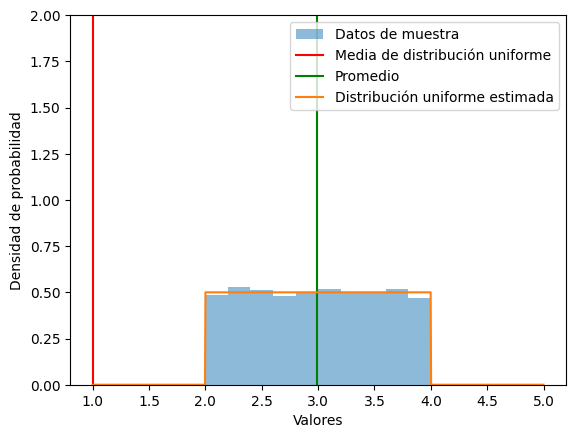

In [ ]:
#Agregandole un valor C a los parametros de la distribución uniforme
c=3
Vmin_c=Vmin+c
Vmax_c=Vmax+c
data2 = np.random.uniform(low=Vmin_c, high=Vmax_c, size=N) #generamos señal
media2= (high_hat-low_hat)/2
promedio2 =np.mean(data2)
varianza2=((high_hat-low_hat)**2/12)

# Estimación de máxima verosimilitud para los parámetros de la distribución gaussiana
result = minimize(lambda params: log_likelihood(params, data2), x0=[2, 4], method='L-BFGS-B')  # Estimar mu y sigma utilizando el método de máxima verosimilitud
low_hat, high_hat = result.x  # Obtener los valores estimados de mu y sigma
N = len(data2) 

media2= (high_hat-low_hat)/2
varianza2=(((high_hat-low_hat)**2)/12)

# Generar una grilla de valores para graficar la distribución gaussiana estimada
x = np.linspace((np.min(data2)-1), (np.max(data2)+1), 1000) 

 # Generar una grilla de valores para el eje x
pdf = np.where((x >= low_hat) & (x <= high_hat), 1 / (high_hat - low_hat), 0)  # Calcular los valores de la distribución uniforme estimada en la grilla de valores x

# Graficar los datos de muestra y la distribución uniforme estimada
plt.hist(data2, density=True, alpha=0.5, label='Datos de muestra')  # Graficar histograma normalizado de los datos de muestra
plt.axvline(media2, color='r', label='Media de distribución uniforme')
plt.axvline(promedio2, color='g', label='Promedio')
plt.plot(x,pdf,  label='Distribución uniforme estimada')  # Graficar la distribución uniforme estimada
plt.legend()  # Agregar leyenda a la gráfica
plt.ylim(0,2)
plt.xlabel('Valores')  # Etiquetar el eje x
plt.ylabel('Densidad de probabilidad')  # Etiquetar el eje y
plt.show()  # Mostrar la gráfica

In [ ]:
print("La media de la distribución es:",media2)
print("La varianza de la distribución es:",varianza2)

La media de la distribución es: 1.0
La varianza de la distribución es: 0.3333333333333333


# ´x=xa

/tmp/ipykernel_1282/1493716250.py:5: RuntimeWarning: invalid value encountered in log
  log_likelihood = -N*np.log(high-low)


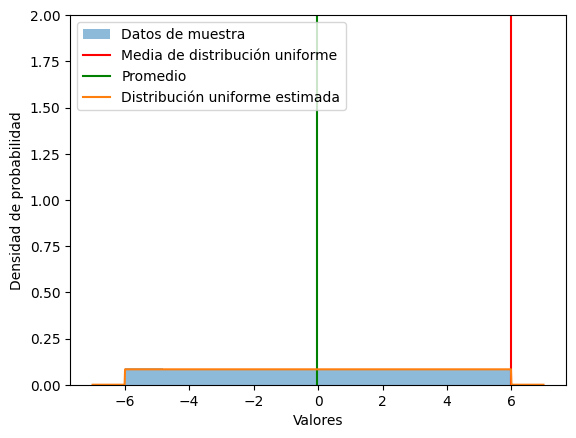

In [ ]:
#Multiplicando un valor A a los parametros de la distribución uniforme
a=6
Vmin_a=Vmin*a
Vmax_a=Vmax*a
data3 = np.random.uniform(low=Vmin_a, high=Vmax_a, size=N)
promedio3 =np.mean(data3)

# Estimación de máxima verosimilitud para los parámetros de la distribución gaussiana
result = minimize(lambda params: log_likelihood(params, data3), x0=[-6, 6], method='L-BFGS-B')  # Estimar mu y sigma utilizando el método de máxima verosimilitud
low_hat, high_hat = result.x  # Obtener los valores estimados de mu y sigma
N = len(data3) 

varianza3=(((high_hat-low_hat)**2)/12)
media3= (high_hat-low_hat)/2

# Generar una grilla de valores para graficar la distribución gaussiana estimada
x = np.linspace((np.min(data3)-1), (np.max(data3)+1), 1000) 

 # Generar una grilla de valores para el eje x
pdf = np.where((x >= low_hat) & (x <= high_hat), 1 / (high_hat - low_hat), 0)  # Calcular los valores de la distribución uniforme estimada en la grilla de valores x

# Graficar los datos de muestra y la distribución uniforme estimada
plt.hist(data3, density=True, alpha=0.5, label='Datos de muestra')  # Graficar histograma normalizado de los datos de muestra
plt.axvline(media3, color='r', label='Media de distribución uniforme')
plt.axvline(promedio3, color='g', label='Promedio')
plt.plot(x,pdf,  label='Distribución uniforme estimada')  # Graficar la distribución uniforme estimada
plt.legend()  # Agregar leyenda a la gráfica
plt.ylim(0,2)
plt.xlabel('Valores')  # Etiquetar el eje x
plt.ylabel('Densidad de probabilidad')  # Etiquetar el eje y
plt.show()  # Mostrar la gráfica

In [ ]:
print("La media de la distribución es:",media3)
print("La varianza de la distribución es:",varianza3)

La media de la distribución es: 6.0
La varianza de la distribución es: 12.0


# Parte 3

In [ ]:
#Generamos el circuito
ctt=Circuit(
"""
    Vi 1 0_1 step;down
    C1 1 2; right, size=1.5
    R1 2 0; down, size=1.5
    C2 3 0_2; right, size=1.5
    R2 2 3; right, size=1.5
    
    W 0_1 0;right
    W 0 0_2;right
    

"""
)


In [ ]:
##cct.draw() 
## V1 1 0 SIN(0 1 1k) ; Fuente de voltaje senoidal de 1kHz, amplitud de 1V

In [ ]:
#Generamos la función de transferencia
H=(ctt.C2.V(s)/ctt.Vi.V(s)).simplify()
H

                   C₁⋅R₁⋅s                    
──────────────────────────────────────────────
             2                                
C₁⋅C₂⋅R₁⋅R₂⋅s  + s⋅(C₁⋅R₁ + C₂⋅R₁ + C₂⋅R₂) + 1

In [ ]:
#Le asignamos valores a los componentes
C1=44.7e-1
C2=0.007e-1
R1=6
R2=6
#escribimos los valores del numerador y denominador de la FT
Coeficientes_num=[C1*R1,0]
Coeficientes_dem=[C1*C2*R2*R1,C1*R1+C2*R1+C2*R2,1]

In [ ]:
#Reemplazamos los componentes con los valores ya asignados
H_valores=H.subs("C1",C1).subs("C2",C2).subs("R1",R1).subs("R2",R2)

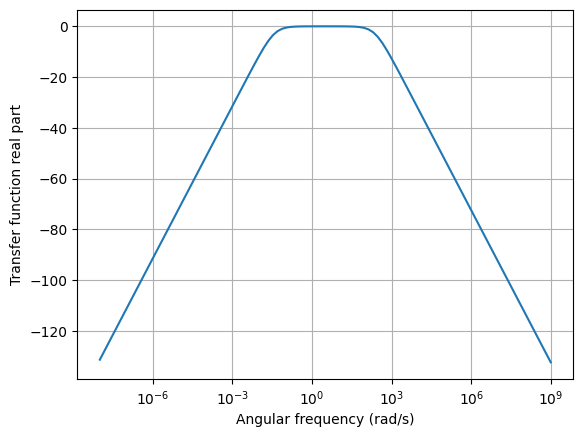

In [ ]:
#Graficamos la funcion de transferencia (pasabandas)
W=logspace(-8,9,100)##Generamos vector de frecuencias 
X=H_valores(j*omega).dB.plot(W,log_frequency=True) #graficar la magnitud en db de la ft


In [ ]:
lti_system=lti(Coeficientes_num,Coeficientes_dem) #con esta funcion se haya la ft
Nsample=4096 #número de muestras
T,h_imp=lti_system.impulse(N=Nsample) #calcula la respuesta al impulso de un sistema, entregando el vector de tiempo y la respuesta al impulso

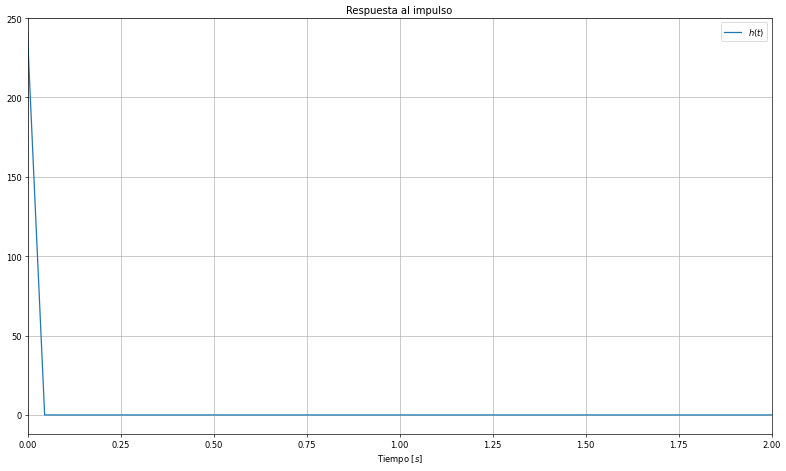

In [ ]:
#Graficamos la respuesta al impulso del circuito
plt.figure(figsize=(16,9), dpi=60)
plt.plot(T,h_imp, label="$h(t)$")
plt.xlim(0,2)
plt.grid(True)
plt.legend()
plt.title("Respuesta al impulso")
plt.xlabel("Tiempo [$s$]")
plt.show()

# Parte 4

In [ ]:
# print(data.shape)
# #Convolucion de la señal de entrada y respuesta al impulso
# # y = np.convolve(data, h_imp, mode='same')  # Salida del circuito
# plt.plot(t,y)  # Graficar la señal de salida
# plt.plot(t,data)  # Graficar la señal de salida

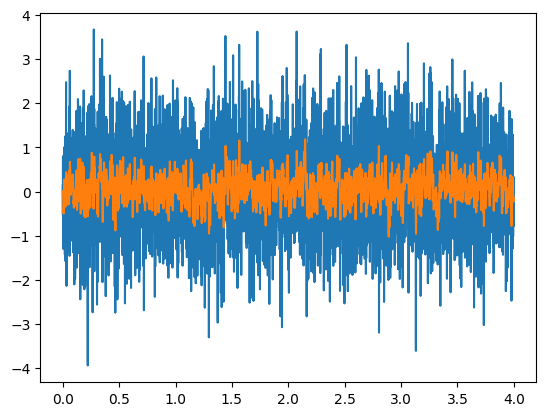

In [ ]:
Fdisc=Nsample/4 # FRECUENCIA DE MUESTREO
Tdisc=1/Fdisc
t=np.arange(0,4,Tdisc) ## GENERAMOS VECTOR DE TIEMPO PARA NUESTRA FUNCIÓN ALEATORIA
#print(t.shape)
#shape= np.pi     
#gamma= np.random.gamma(shape,size=len(t))
_,Output_Circuit,_=lti_system.output(data, t) ##SALIDA DEL CIRCUITO.
plt.plot(t,data)
plt.plot(t,Output_Circuit)  # Graficar la señal de salida


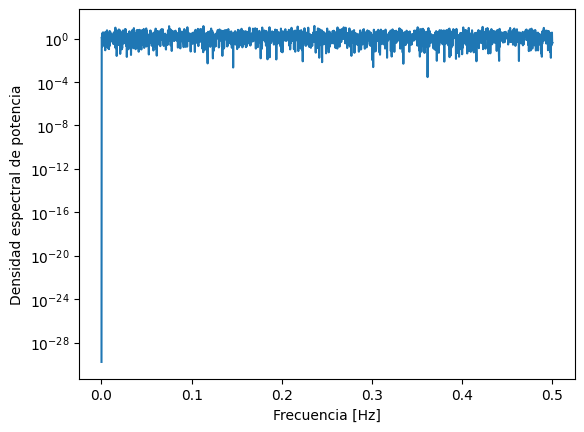

In [ ]:
#Espectro de potencias de la señal de entrada
# Calcular el espectro de potencia
f, Pxx = signal.periodogram(data)

# Graficar el espectro de potencia
plt.semilogy(f, Pxx)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.show()

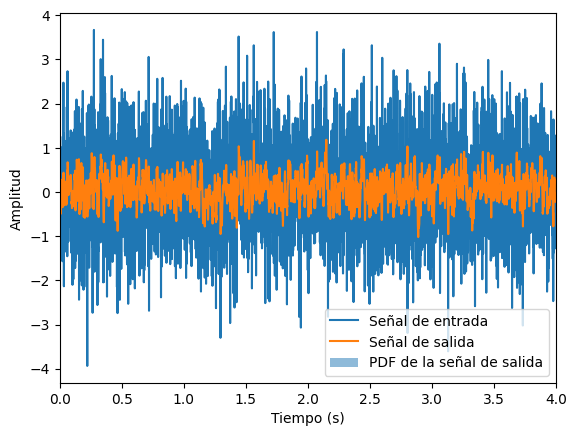

In [ ]:
# Estimar la PDF de la señal de salida utilizando la estimación por kernel
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(Output_Circuit.reshape(-1, 1))  # Crear el objeto KernelDensity y ajustarlo a los datos
x_pdf = np.linspace(np.min(Output_Circuit), np.max(Output_Circuit), 4096)  # Generar una grilla de valores para el eje x
pdf = np.exp(kde.score_samples(x_pdf.reshape(-1, 1)))  # Calcular la PDF utilizando el objeto KernelDensity ajustado

# Graficar la señal de entrada, la señal de salida y la PDF de la señal de salida
plt.plot(t, data, label='Señal de entrada')  # Graficar la señal de entrada
plt.plot(t, Output_Circuit, label='Señal de salida')  # Graficar la señal de salida
plt.fill_between(x_pdf, pdf, alpha=0.5, label='PDF de la señal de salida')  # Graficar la PDF de la señal de salida
plt.legend()  # Agregar leyenda a la gráfica
plt.xlabel('Tiempo (s)')  # Etiquetar el eje x
plt.ylabel('Amplitud')  # Etiquetar el eje y
plt.xlim([0, 4])
plt.show()  # Mostrar la gráfica


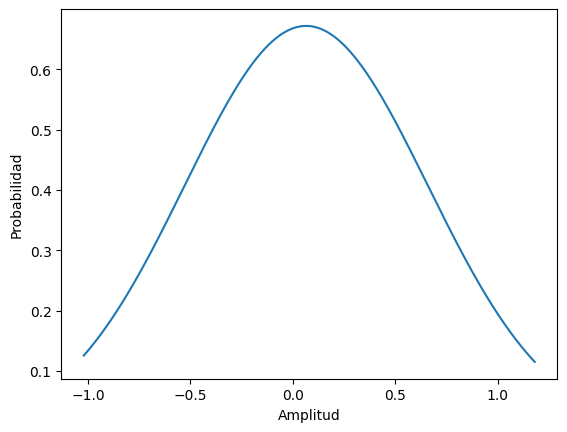

In [ ]:
# Ajustar objeto KernelDensity a los datos de la señal de salida
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(Output_Circuit.reshape(-1, 1))

# Generar una grilla de valores para el eje x
x_pdf = np.linspace(np.min(Output_Circuit), np.max(Output_Circuit), 4096)

# Calcular la función de densidad de probabilidad utilizando el objeto KernelDensity ajustado
pdf = np.exp(kde.score_samples(x_pdf.reshape(-1, 1)))

# Graficar la PDF de la señal de salida
plt.plot(x_pdf, pdf)
plt.xlabel('Amplitud')
plt.ylabel('Probabilidad')
plt.show()


In [ ]:
# Media de la PDF estimada
pdf_mean = np.mean(x_pdf * pdf)
# Varianza de la PDF estimada
pdf_var = np.mean((x_pdf - pdf_mean)**2 * pdf)
print("Media de la señal de salida: {:.2f}".format(pdf_mean))
print("Varianza de la señal de salida: {:.2f}".format(pdf_var))

Media de la señal de salida: 0.03
Varianza de la señal de salida: 0.11


In [ ]:
media_entrada = np.mean(data)
varianza_entrada = np.var(data)
print("Media de la señal de entrada: {:.2f}".format(media_entrada))
print("Varianza de la señal de entrada: {:.2f}".format(varianza_entrada))


Media de la señal de entrada: 0.07
Varianza de la señal de entrada: 1.03


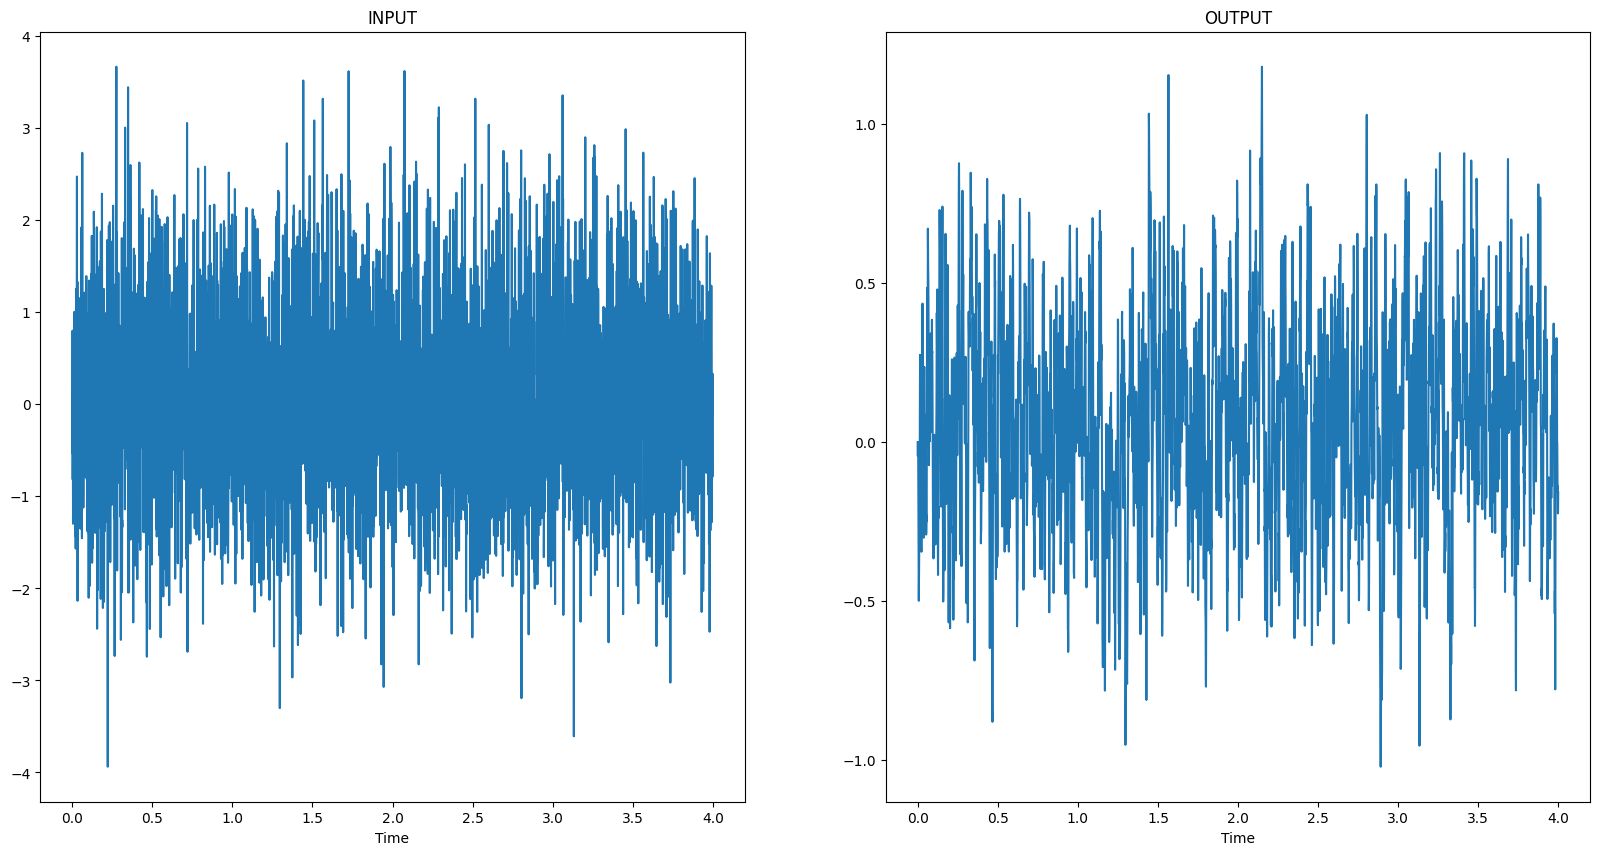

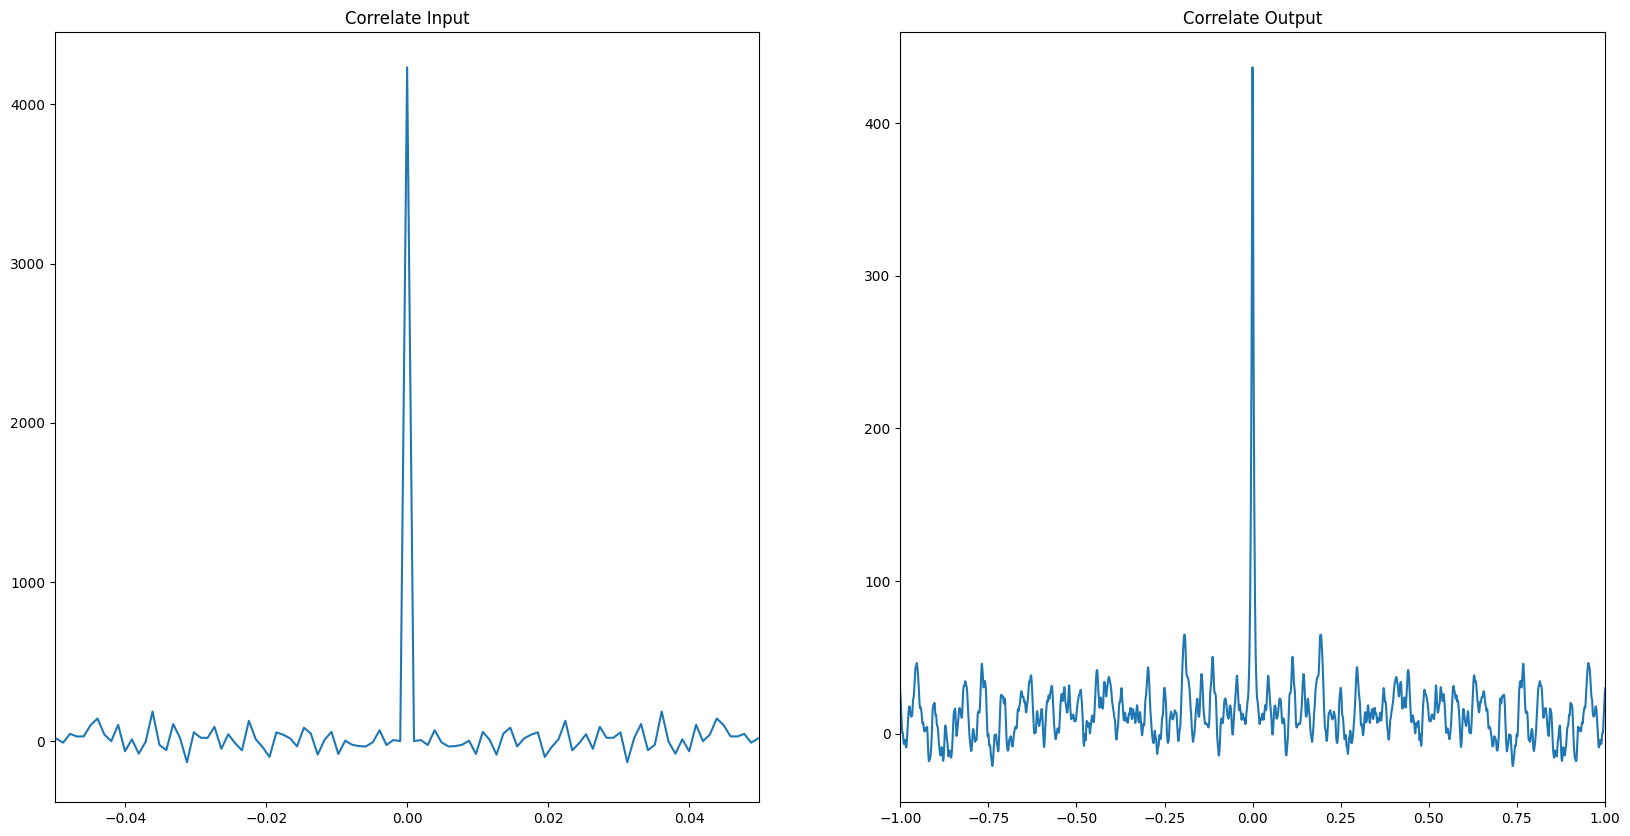

In [ ]:
Autocorrelacion_expt=np.correlate(data,data,mode="same") ## GENERAMOS LA AUTOCORRELACION

Autocorrelacion_Output=np.correlate(Output_Circuit,Output_Circuit,mode="same") 
fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t, data)
axs[0].set_title("INPUT")
axs[0].set_xlabel("Time")
axs[1].plot(t, Output_Circuit)
axs[1].set_title("OUTPUT")
axs[1].set_xlabel("Time")




fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t-2,Autocorrelacion_expt)
axs[0].set_title("Correlate Input")
axs[0].set_xlim(-0.05,0.05)
axs[1].plot(t-2, Autocorrelacion_Output)
axs[1].set_title("Correlate Output")
axs[1].set_xlim(-1,1)


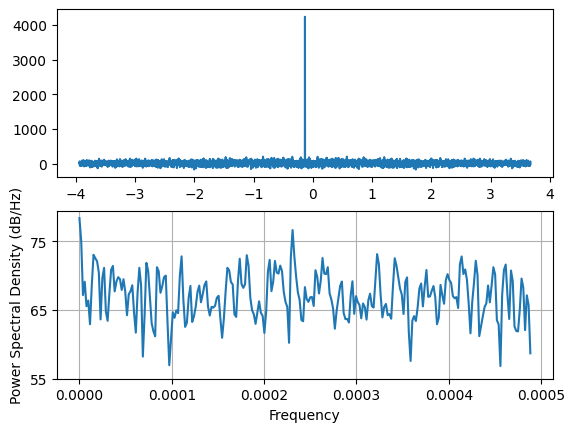

In [ ]:
#Espectro de densidad de potencia de la entrada
ax = np.linspace(np.min(data), np.max(data), 4096)
plt.subplot(211)
plt.plot(ax, Autocorrelacion_expt)
plt.subplot(212)
plt.psd(Autocorrelacion_expt, 512, Tdisc)
 
plt.show()

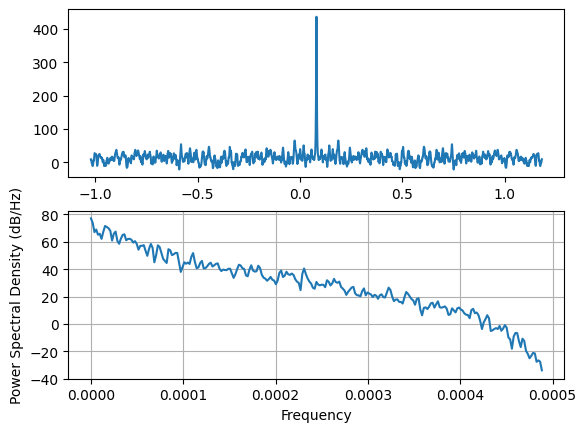

In [ ]:
#Espectro de densidad de potencia de la salida
ax = np.linspace(np.min(data), np.max(data), 4096)
plt.subplot(211)
plt.plot(x_pdf, Autocorrelacion_Output)
plt.subplot(212)
plt.psd(Autocorrelacion_Output, 512, Tdisc)
 
plt.show()

TALLER 2

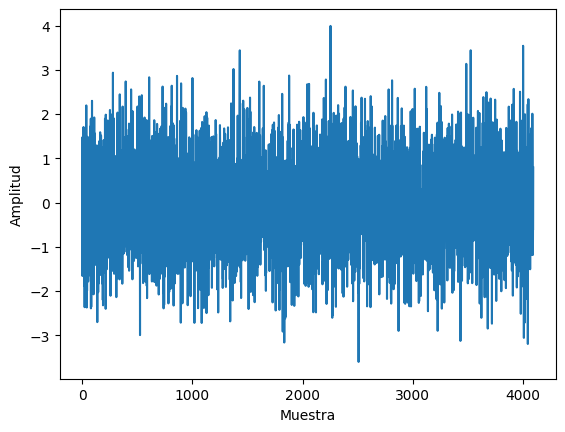

In [ ]:
#Ruido blanco 
media = 0
varianza = 1
N = 4096
Fdisc=N/4 # FRECUENCIA DE MUESTREO
Tdisc=1/Fdisc
t= np.arange(0,4,Tdisc)
Ruido_blanco= np.random.normal(media, varianza, size=len(t))

plt.plot(Ruido_blanco)
plt.xlabel('Muestra')
plt.ylabel('Amplitud')
plt.show()

In [ ]:
Autocorrelacion_entrada=np.correlate(Ruido_blanco,Ruido_blanco,mode="same") ## GENERAMOS LA AUTOCORRELACION

#Funcion de correlacion normal
#plt.plot(Autocorrelacion_entrada)
#plt.show()

#Funcion de correlacion centrada en 0
#x = np.arange(-N//2+1, N//2+1)
#plt.plot(x, Autocorrelacion_entrada)
#plt.show()


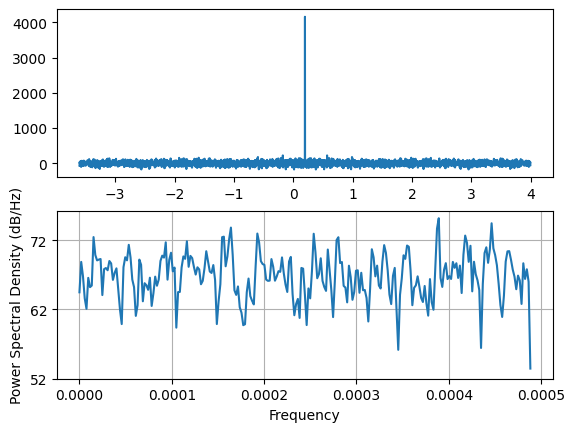

In [ ]:
#Espectro de densidad de potencia de la entrada
ax = np.linspace(np.min(Ruido_blanco), np.max(Ruido_blanco), 4096)
plt.subplot(211)
plt.plot(ax, Autocorrelacion_entrada) #Graficamos la funcion de autocorrelación
plt.subplot(212)
plt.psd(Autocorrelacion_entrada, 512, Tdisc) #Graficamos la densidad espectral
 
plt.show()

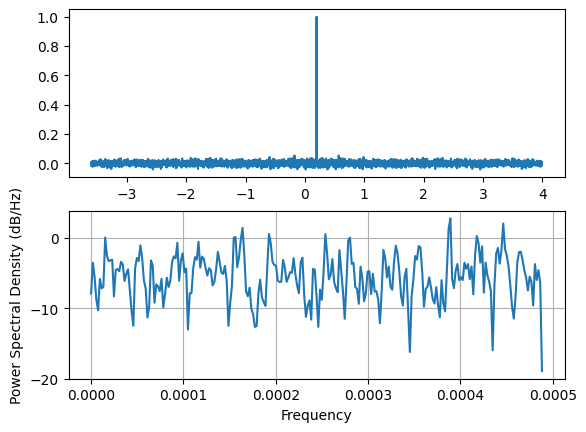

In [ ]:
Autocorrelacion_entradaNormalizada=Autocorrelacion_entrada/Autocorrelacion_entrada.max() ## GENERAMOS LA AUTOCORRELACION normalizada a la entrada
#Espectro de densidad de potencia de la entrada
ax = np.linspace(np.min(Ruido_blanco), np.max(Ruido_blanco), 4096)

plt.subplot(211)
plt.plot(ax, Autocorrelacion_entradaNormalizada) #Graficamos la funcion de autocorrelación
plt.subplot(212)
plt.psd(Autocorrelacion_entradaNormalizada, 512, Tdisc) #Graficamos la densidad espectral
 
plt.show()

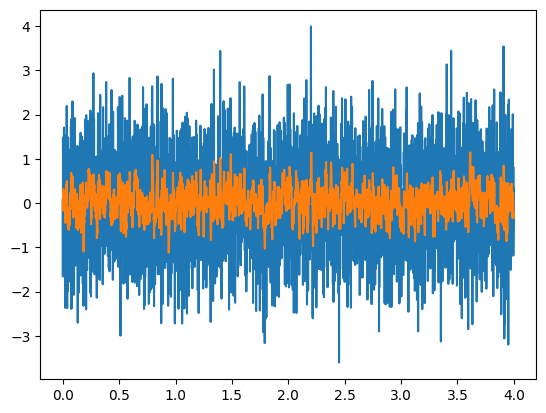

In [ ]:
#Salida del circuito con el ruido blanco gaussiano
Fdisc=Nsample/4 # FRECUENCIA DE MUESTREO
Tdisc=1/Fdisc
t=np.arange(0,4,Tdisc)
_,Output_Circuit,_=lti_system.output(Ruido_blanco, t) ##SALIDA DEL CIRCUITO.
plt.plot(t, Ruido_blanco)
plt.plot(t,Output_Circuit)

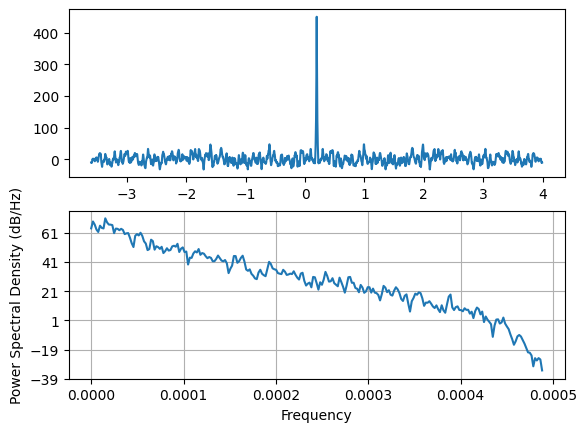

In [ ]:
Autocorrelacion_Output2=np.correlate(Output_Circuit,Output_Circuit,mode="same") 
ax = np.linspace(np.min(Ruido_blanco), np.max(Ruido_blanco), 4096)
plt.subplot(211)
plt.plot(ax, Autocorrelacion_Output2) #Graficamos la funcion de autocorrelación
plt.subplot(212)
plt.psd(Autocorrelacion_Output2, 512, Tdisc) #Graficamos la densidad espectral
 
plt.show()


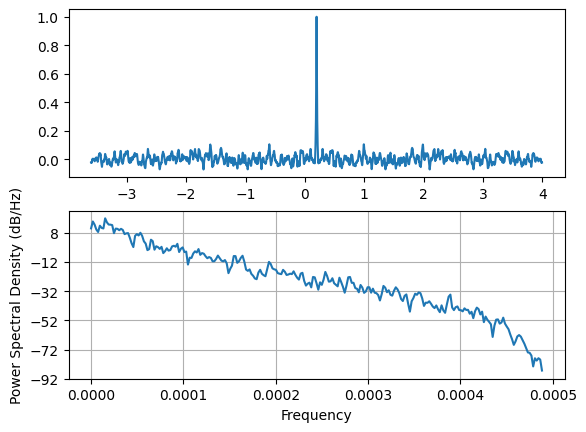

In [ ]:
Autocorrelacion_Normalizacion=Autocorrelacion_Output2/Autocorrelacion_Output2.max()
ax = np.linspace(np.min(Ruido_blanco), np.max(Ruido_blanco), 4096)
plt.subplot(211)
plt.plot(ax, Autocorrelacion_Normalizacion) #Graficamos la funcion de autocorrelación
plt.subplot(212)
plt.psd(Autocorrelacion_Normalizacion, 512, Tdisc) #Graficamos la densidad espectral
 
plt.show()

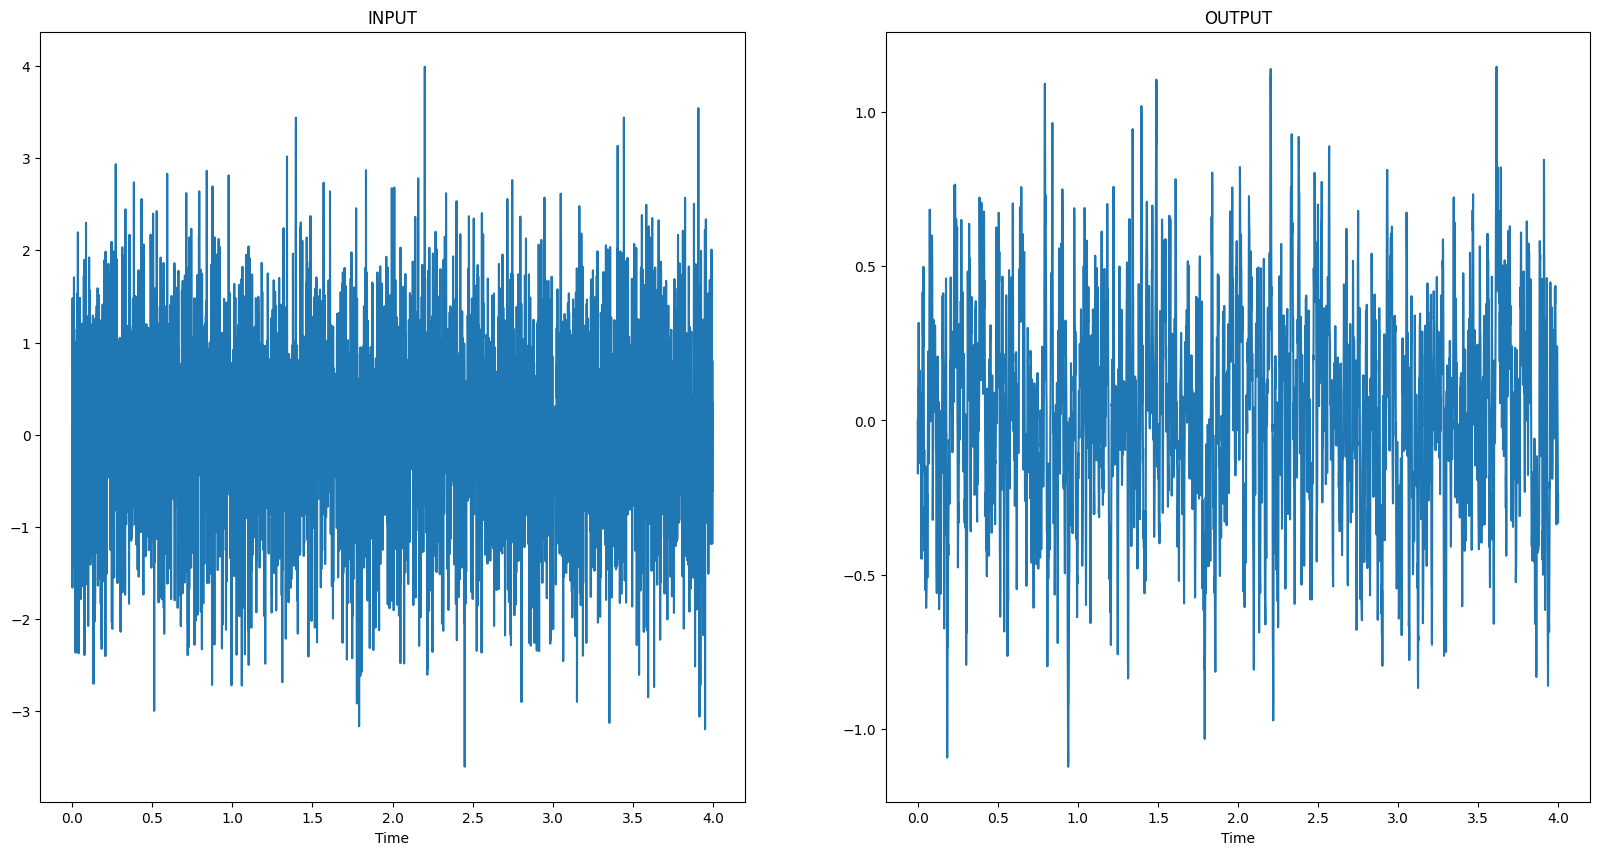

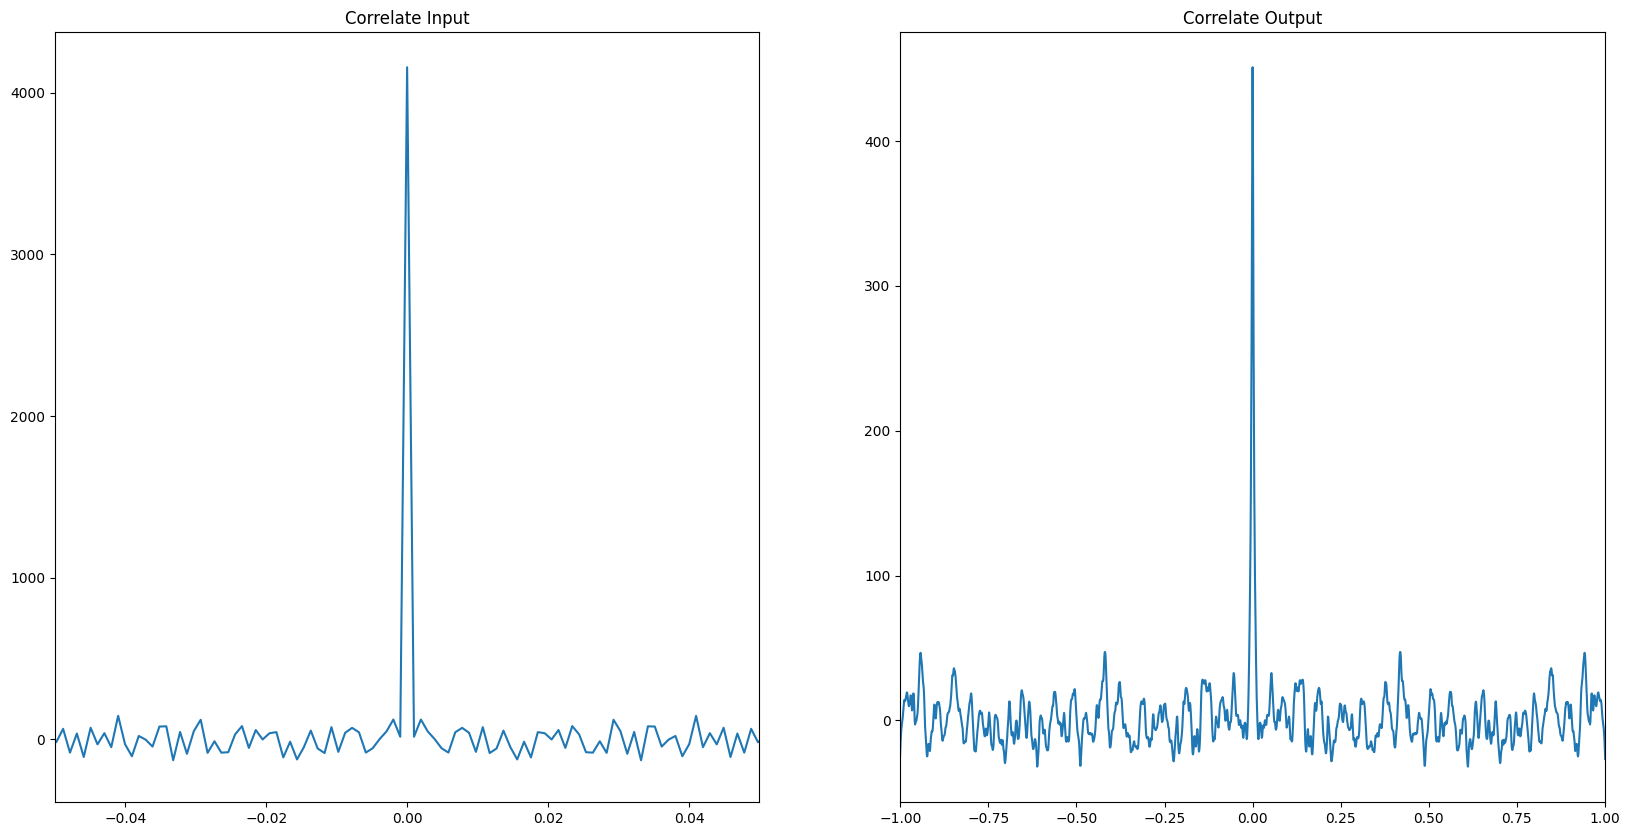

In [ ]:
fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t, Ruido_blanco)
axs[0].set_title("INPUT")
axs[0].set_xlabel("Time")
axs[1].plot(t, Output_Circuit)
axs[1].set_title("OUTPUT")
axs[1].set_xlabel("Time")




fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t-2,Autocorrelacion_entrada)
axs[0].set_title("Correlate Input")
axs[0].set_xlim(-0.05,0.05)
axs[1].plot(t-2, Autocorrelacion_Output2)
axs[1].set_title("Correlate Output")
axs[1].set_xlim(-1,1)

# Ruido Blanco Gaussiano mas una señal sinusoide 

In [ ]:
N = 4096
Fdisc=N/4 # FRECUENCIA DE MUESTREO
Tdisc=1/Fdisc
t1= np.arange(0,4,Tdisc)

# Parámetros de la señal aleatoria
duracion = 10  # en segundos

noise1 = np.random.normal(0, 1, N)


In [ ]:
# Parámetros de la señal senoidal

amplitud = 1
frecuencia = 10 # Número de ciclos por unidad de tiempo
fase = np.pi / 2  # Fase inicial en radianes

# Parámetros de la ventana de Hamming
#N = len(t1)  # Número total de muestras

# Generar la señal senoidal
seno = amplitud * np.sin(2 * np.pi * frecuencia * t1 + fase)

señalFinal=seno+noise1

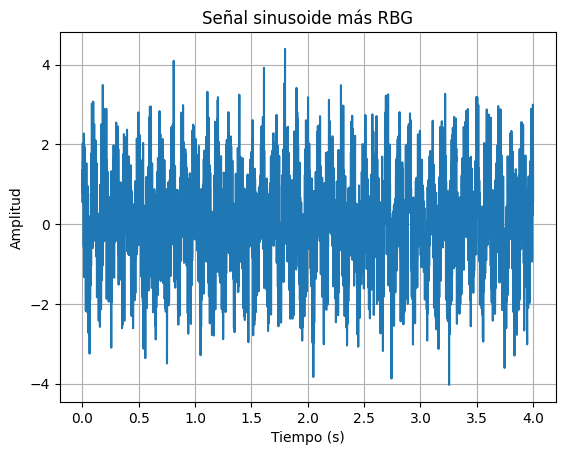

In [ ]:
# Visualizar la señal final
plt.plot(t1, señalFinal)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal sinusoide más RBG')
plt.grid(True)
plt.show()
     

Función de correlación del Ruido Blanco Gaussiano

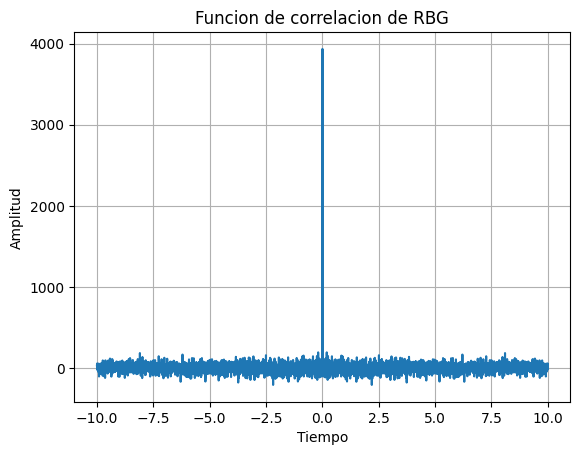

In [ ]:
Autocorrelacion_RBG=np.correlate(noise1,noise1,mode="same")

# Vector de tiempo para la autocorrelación
t_autocorr = np.linspace(-duracion, duracion, N)
plt.plot(t_autocorr , Autocorrelacion_RBG)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Funcion de correlacion de RBG')
plt.grid(True)
plt.show()

Función de correlación de la señal sinusoide

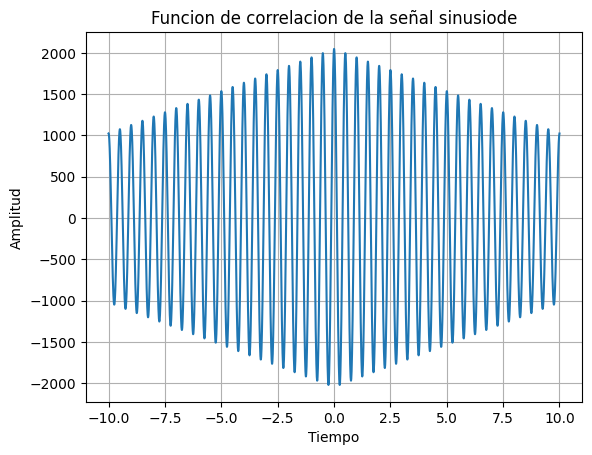

In [ ]:
Autocorrelacion_seno=np.correlate(seno,seno,mode="same")

# Vector de tiempo para la autocorrelación
t_autocorr = np.linspace(-duracion, duracion, N)
plt.plot(t_autocorr , Autocorrelacion_seno)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Funcion de correlacion de la señal sinusiode')
plt.grid(True)
plt.show()

Función de correlación, aplicando ventaneo

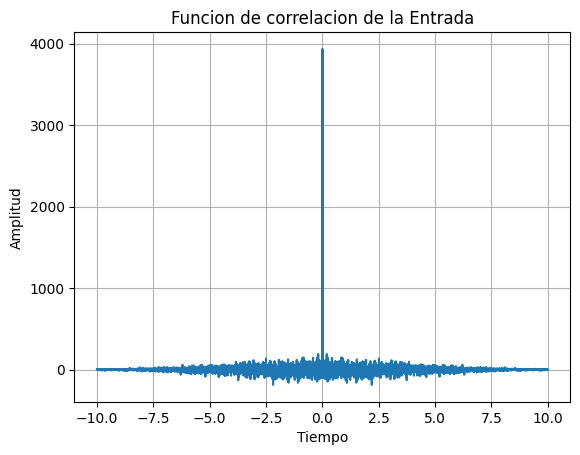

In [ ]:

# Generar la ventana de Hamming solo para la señal de correlación
ventana_hamming = 0.54 - 0.46 * np.cos((2 * np.pi * np.arange(N)) / (N - 1))

# Aplicar la ventana de Hamming solo a la señal de correlación
señal_correlacion_ventaneada = Autocorrelacion_RBG * ventana_hamming

# Sumar la señal senoidal y la señal de correlación ventaneada
señal_generada = seno + señal_correlacion_ventaneada

# Graficar la señal generada

plt.plot(t_autocorr, señal_generada)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Funcion de correlacion de la Entrada')
plt.grid(True)
plt.show()

Autocorrelación Normalizada

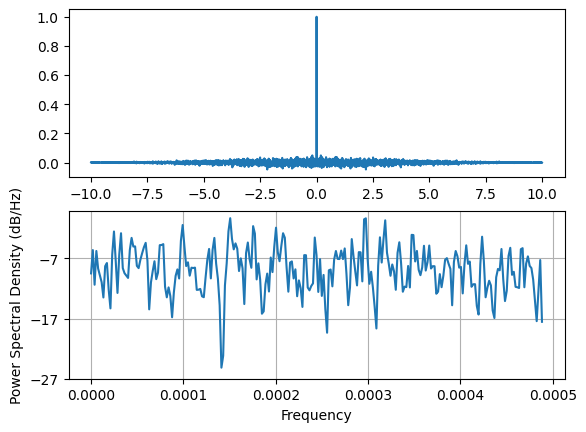

In [ ]:
senal_generada_normalizada=señal_generada/señal_generada.max()
ax = np.linspace(-np.min(señal_generada), np.max(señal_generada), N)
plt.subplot(211)
plt.plot(t_autocorr, senal_generada_normalizada) #Graficamos la funcion de autocorrelación
plt.subplot(212)
plt.psd(senal_generada_normalizada, 512, Tdisc) #Graficamos la densidad espectral
 
plt.show()

Función de correlación de la salida

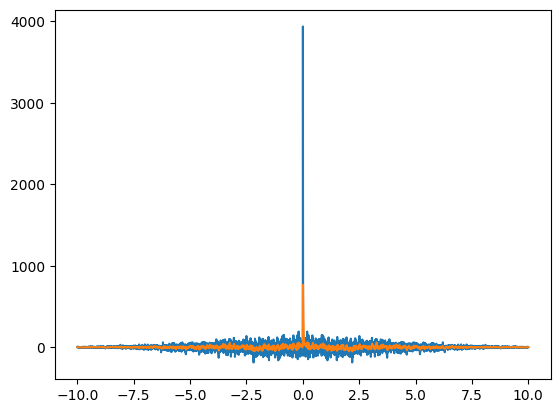

In [ ]:
#Salida del circuito con el ruido blanco gaussiano
Fdisc=Nsample/4 # FRECUENCIA DE MUESTREO
Tdisc=1/Fdisc
t=np.arange(0,4,Tdisc)
_,Output_Circuit,_=lti_system.output(señal_generada, t) ##SALIDA DEL CIRCUITO.
plt.plot(t_autocorr, señal_generada)
plt.plot(t_autocorr,Output_Circuit)

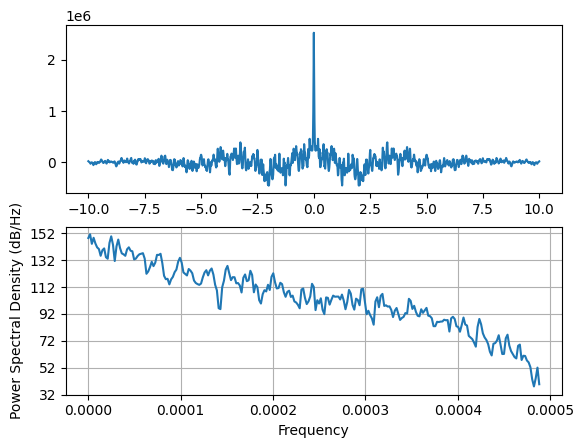

In [ ]:
Autocorrelacion_salida=np.correlate(Output_Circuit,Output_Circuit,mode="same") 
ax = np.linspace(np.min(señal_generada), np.max(señal_generada), 4096)
plt.subplot(211)

plt.plot(t_autocorr, Autocorrelacion_salida) #Graficamos la funcion de autocorrelación
plt.subplot(212)
plt.psd(Autocorrelacion_salida, 512, Tdisc) #Graficamos la densidad espectral
 
plt.show()


Normalizacion

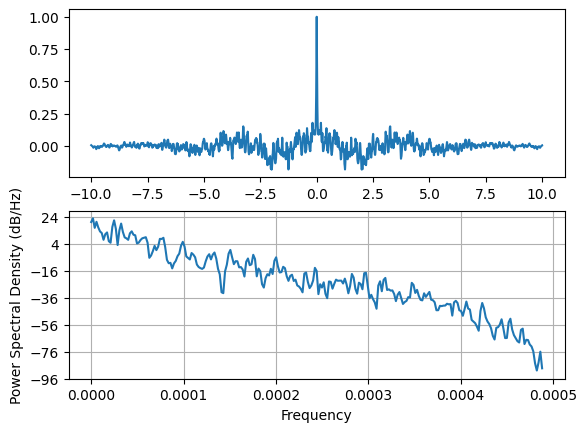

In [ ]:
señal_salida_normalizada=Autocorrelacion_salida/Autocorrelacion_salida.max()
ax = np.linspace(np.min(Autocorrelacion_salida), np.max(Autocorrelacion_salida), N)
plt.subplot(211)
plt.plot(t_autocorr, señal_salida_normalizada) #Graficamos la funcion de autocorrelación
plt.subplot(212)
plt.psd(señal_salida_normalizada, 512, Tdisc) #Graficamos la densidad espectral
 
plt.show()

# Demostraciones

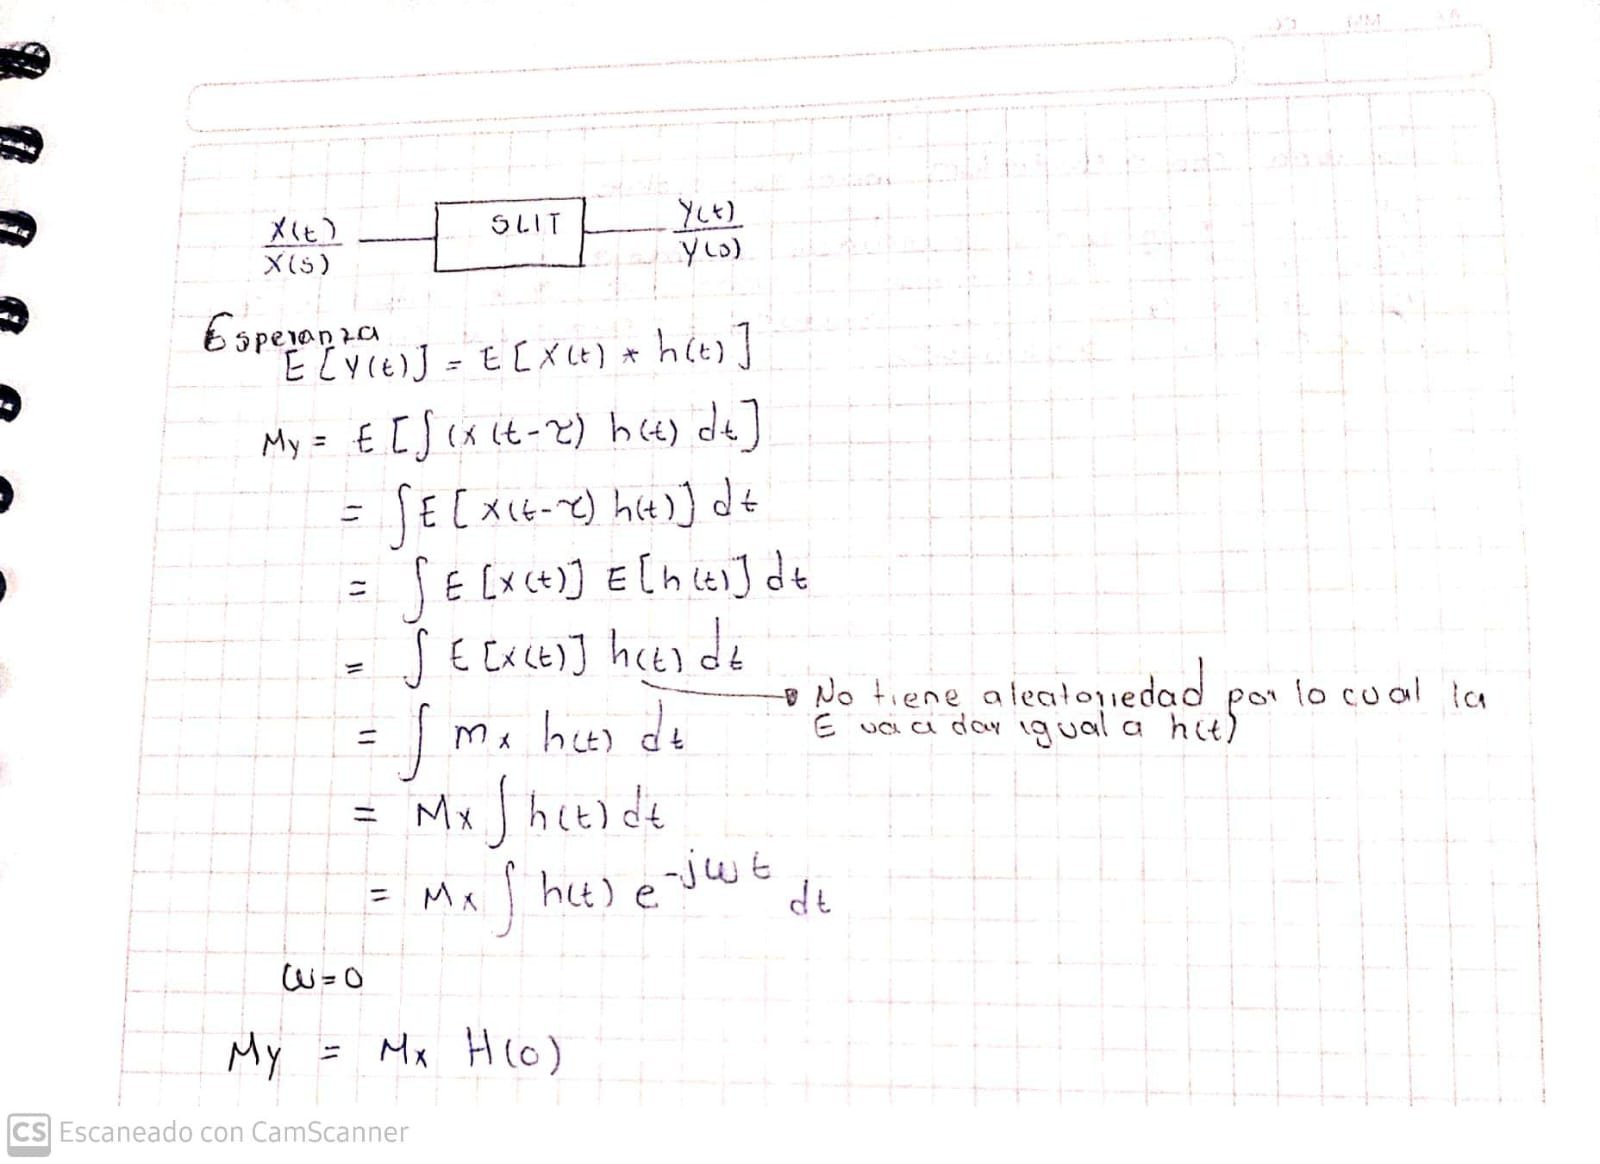

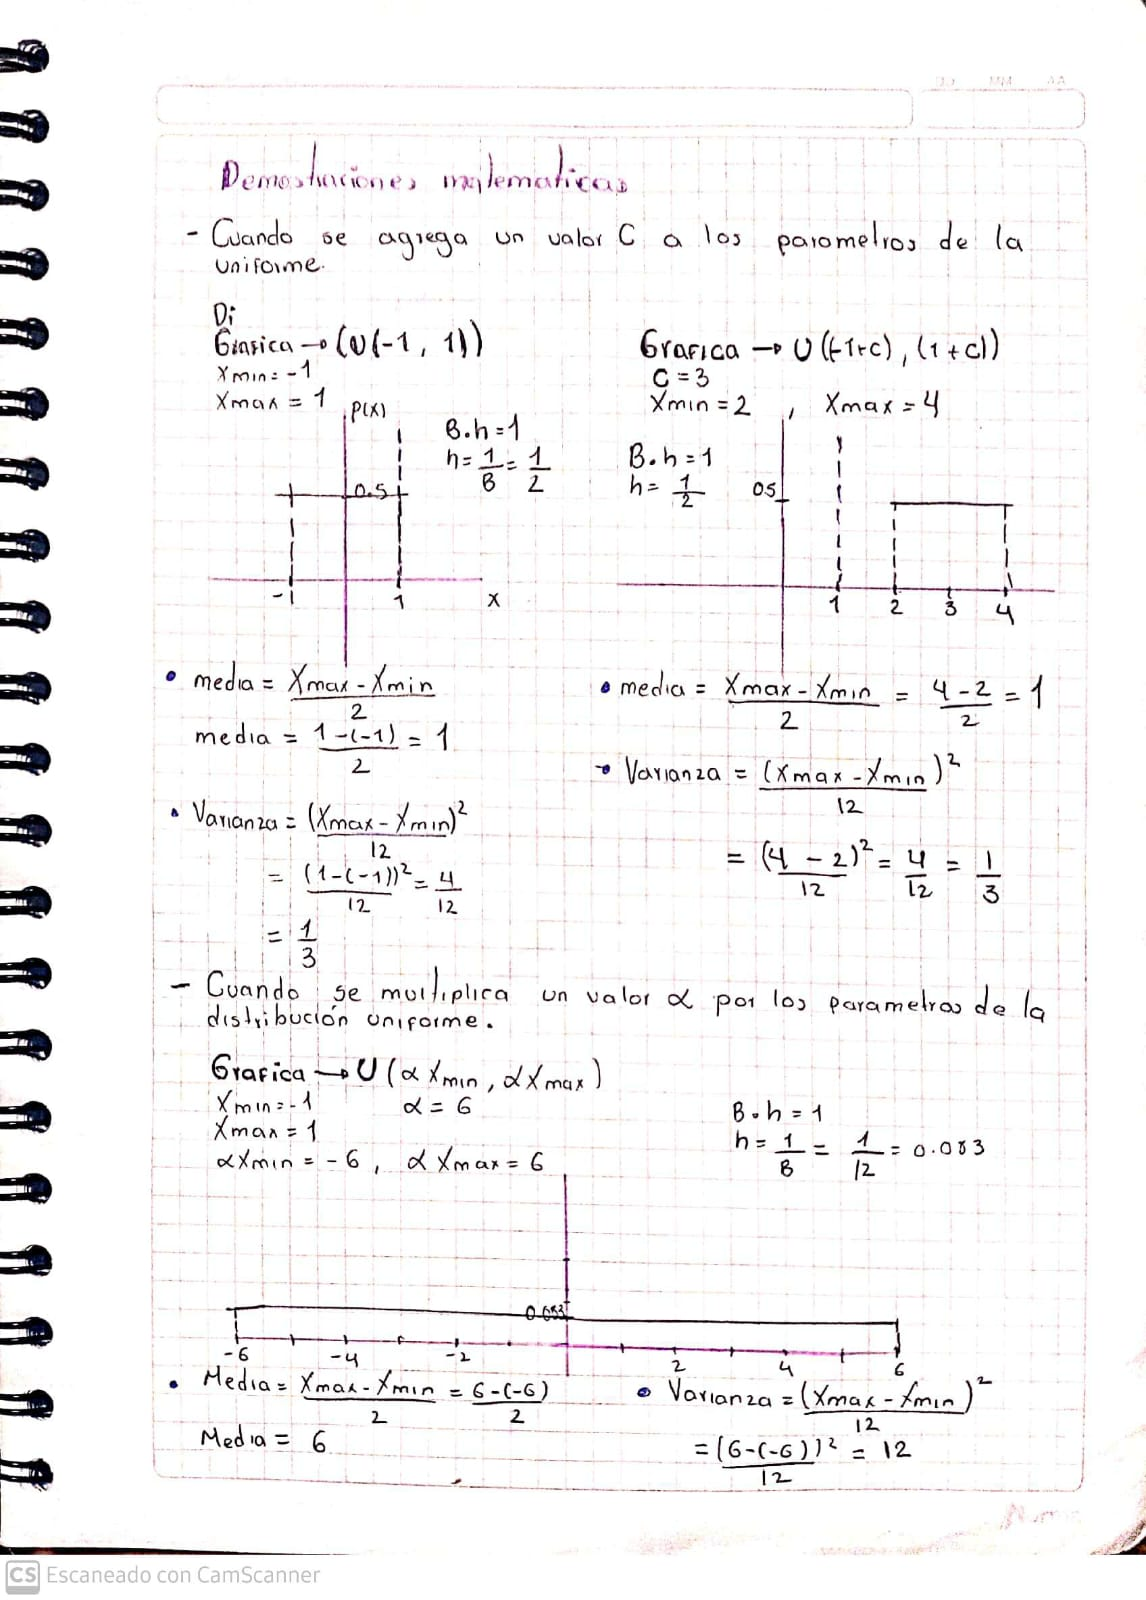

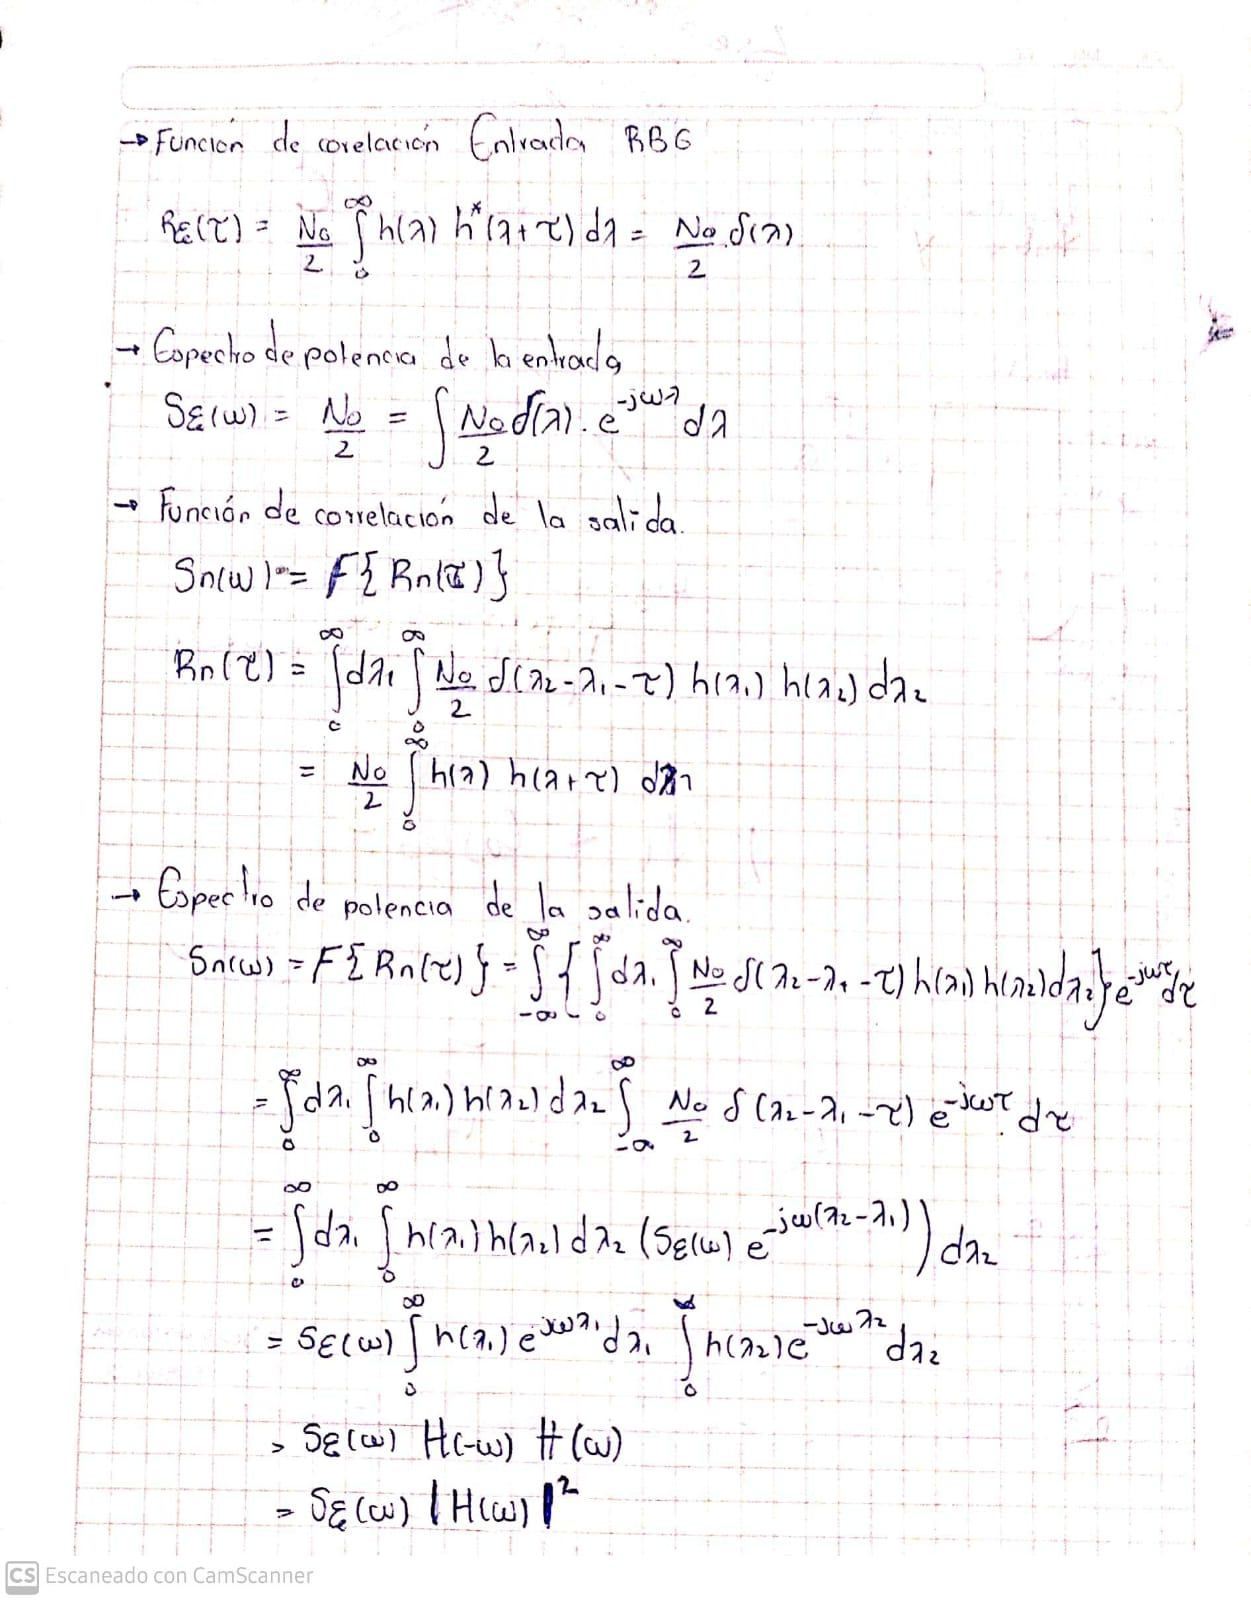

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=671a449e-be09-4113-bc97-6b850ce0e6ee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>